# Лабораторна робота 2

**Виконав:** Чик Іван<br>
**Мета:** Змінити код нейронної мережі, створити валідаційний датасет, використати функцію EarlyStopping() та шар Dropout.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/

Mounted at /content/gdrive
/content/gdrive/MyDrive


Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_187 (Dense)           (None, 256)               2304      
                                                                 
 dropout_61 (Dropout)        (None, 256)               0         
                                                                 
 dense_188 (Dense)           (None, 128)               32896     
                                                                 
 dense_189 (Dense)           (None, 2)                 258       
                                                                 
Total params: 35458 (138.51 KB)
Trainable params: 35458 (138.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/400
20/20 [==============================] - 2s 19ms/step - loss: 0.6488 - accuracy: 0.6368 - val_loss: 0.5963 - val_accuracy: 0.6364
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


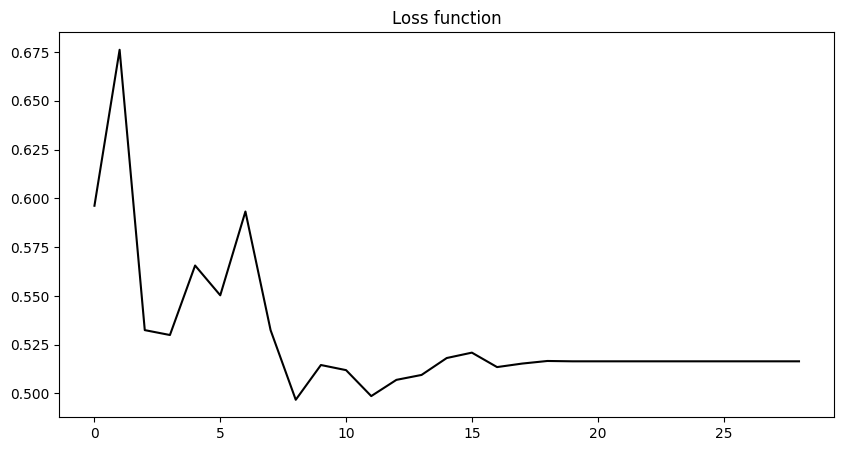

In [63]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers.schedules import CosineDecay
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np

dataset = np.loadtxt("machine learning/pima-indians-diabetes.csv", delimiter=",")
X=dataset[:,0:8]
Y=dataset[:,8]

encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y.reshape(-1, 1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
  Dense(256, input_dim=np.size(X,1), activation='relu'),
  Dropout(0.2),
  Dense(128, activation='relu'),
  Dense(2, activation='softmax')])

epochs=400
initial_learning_rate=0.01
decay_steps=epochs

cosine_decay=CosineDecay(initial_learning_rate, decay_steps)

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=cosine_decay, amsgrad=True), metrics=['accuracy'])
model.summary()
start=datetime.now()

early_stopping = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=32, callbacks=[early_stopping])
end = datetime.now()
print("Training time",end-start)

loss, accuracy = model.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

probabilities = model.predict(X_test)
predicted_labels = np.argmax(probabilities, axis=1)
true_labels = np.argmax(Y_test, axis=1)
accuracy = np.mean(predicted_labels == true_labels)
print("Prediction Accuracy: %.2f%%" % (accuracy * 100))

accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

model.save('my_model2.h5')

plt.figure(figsize=(10,5))
plt.title('Loss function')
plt.plot(val_loss, 'k')

plt.show()

1. Імпортуємо бібліотеки для роботи з даними та для машинного навчання

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np

2. Завантажуємо датасет у змінну та підготовлюємо його за допомогою функцій MinMaxScaler() та OneHotEncoder(), sparse=False означає, що нам потрібен розріджений масив замість розрідженої матриці.

In [ ]:
dataset = np.loadtxt("machine learning/pima-indians-diabetes.csv", delimiter=",")
X=dataset[:,0:8]
Y=dataset[:,8]

encoder = OneHotEncoder(sparse=False)
Y = encoder.fit_transform(Y.reshape(-1, 1))
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


3. Створюємо модель нейронної мережі:
Перший прихований шар - 256 нейронів, функція активації ReLU
Другий прихований шар - 128 нейронів, функція активації ReLU
Вихідний шар - 2 нейрони, функція активації SoftMax

In [ ]:
model = Sequential([
  Dense(256, input_dim=np.size(X,1), activation='relu'),
  Dropout(0.1),
  Dense(128, activation='relu'),
  Dense(2, activation='softmax')])

4. Скомпільовуємо модель, функція втрат - binary crossentropy та оптимізатор Adam із рівнем навчання 0.001


In [ ]:
#model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()
start=datetime.now()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2304      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                                 
Total params: 35458 (138.51 KB)
Trainable params: 35458 (138.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


5. Підігнати модель до даних означає навчити модель на певних даних(X та Y_enc).
verbose=2 вказує, скільки логів ми побачимо під час руху моделі. Функція EarlyStopping() припиняє тренування, коли показник 'val_loss' перестав покращуватися.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Adjust patience as needed
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=400, batch_size=16, verbose=2, callbacks=early_stopping)
end = datetime.now()
print("Training time",end-start)

Epoch 1/400
77/77 - 1s - loss: 0.4342 - accuracy: 0.7997 - val_loss: 0.5112 - val_accuracy: 0.7987 - 1s/epoch - 13ms/step
Epoch 2/400
77/77 - 1s - loss: 0.4416 - accuracy: 0.7834 - val_loss: 0.5473 - val_accuracy: 0.6883 - 1s/epoch - 14ms/step
Epoch 3/400
77/77 - 2s - loss: 0.4443 - accuracy: 0.7736 - val_loss: 0.5060 - val_accuracy: 0.7922 - 2s/epoch - 22ms/step
Epoch 4/400
77/77 - 0s - loss: 0.4461 - accuracy: 0.7850 - val_loss: 0.5029 - val_accuracy: 0.7727 - 381ms/epoch - 5ms/step
Epoch 5/400
77/77 - 0s - loss: 0.4293 - accuracy: 0.7932 - val_loss: 0.5148 - val_accuracy: 0.7987 - 352ms/epoch - 5ms/step
Epoch 6/400
77/77 - 0s - loss: 0.4308 - accuracy: 0.7997 - val_loss: 0.5058 - val_accuracy: 0.7857 - 239ms/epoch - 3ms/step
Epoch 7/400
77/77 - 0s - loss: 0.4231 - accuracy: 0.7997 - val_loss: 0.5098 - val_accuracy: 0.7662 - 230ms/epoch - 3ms/step
Epoch 8/400
77/77 - 0s - loss: 0.4192 - accuracy: 0.8029 - val_loss: 0.5127 - val_accuracy: 0.7857 - 282ms/epoch - 4ms/step
Epoch 9/400
77

6. Оцінюємо модель

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

5/5 [==============================] - 0s 6ms/step - loss: 0.5029 - accuracy: 0.7727

Loss: 0.50, Accuracy: 77.27%


7. Функція predict() - це те, що ми викликаємо для того, щоб модель робила прогнози. У функцію predict() ми передаємо змінну під назвою X. Це змінна, яка містить наші тестові дані

In [ ]:
probabilities = model.predict(X_test)
predicted_labels = np.argmax(probabilities, axis=1)
true_labels = np.argmax(Y_test, axis=1)
accuracy = np.mean(predicted_labels == true_labels)
print("Prediction Accuracy: %.2f%%" % (accuracy * 100))

accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

model.save('my_model2.h5')

5/5 [==============================] - 0s 3ms/step
Prediction Accuracy: 77.27%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8. Будуємо графік функції втрат, як бачимо, втрати рухаються до нуля

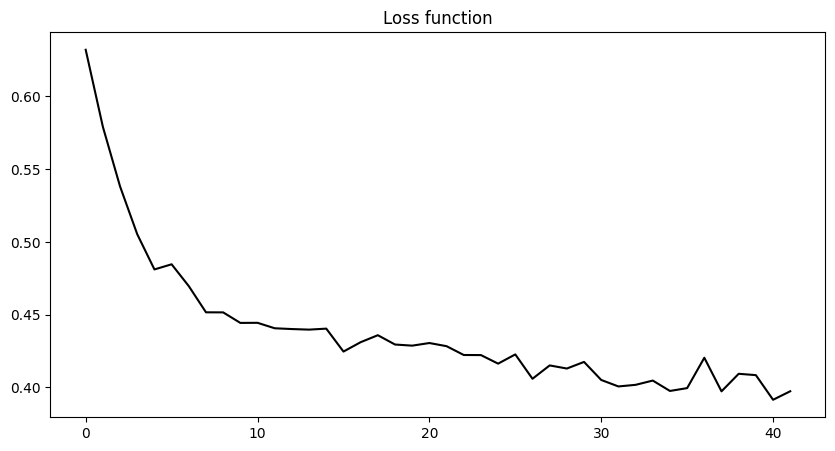

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Loss function')
plt.plot(loss, 'k')

plt.show()

In [ ]:
!pip install keras==2.14.0 --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: Keras 1.0.1
    Uninstalling Keras-1.0.1:
      Successfully uninstalled Keras-1.0.1


---

**Оригінальний код**

---

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 21 12:13:34 2022

@author: maksymyuk
"""

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # Change to MinMaxScaler
import numpy as np

# Load and prepare the dataset
dataset = np.loadtxt("machine learning/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing using MinMaxScaler
scaler = MinMaxScaler()  # Use MinMaxScaler
X_train = scaler.transform(X_train)
X_test = scaler.fit_transform(X_test)

# 1. define the network
model = Sequential()
model.add(Dense(256, input_dim=np.size(X, 1), activation='relu'))
model.add(Dropout(0.1))  # Adjust dropout rate as needed
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 2. compile the network
optimizer = Adam(learning_rate=0.001)  # Experiment with different learning rates
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

# 3. fit the network
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Adjust patience as needed
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=2000, batch_size=32, callbacks=early_stopping)

# 4. evaluate the network
loss, accuracy = model.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy * 100))

# 5. make predictions
probabilities = model.predict(X_test)
predictions = [1 if x > 0.5 else 0 for x in probabilities]
accuracy = np.mean(predictions == Y_test)
print("Prediction Accuracy: %.2f%%" % (accuracy * 100))

model.save('my_model.h5')



